In [1]:
import requests
import json
from requests.exceptions import HTTPError
from time import sleep
countries = ['GB','DE','FR','ES','UY','RO','FI','SG','AW']
data = ['' for i in range(len(countries))]

for i in range(len(countries)):
    url = 'https://api.co2signal.com/v1/latest?countryCode=%s' %countries[i]
    api_key = '242c3758c804db24'
    headers = {'Content-type': 'application/json', 'Accept': 'text/plain', 'auth-token': api_key}

    try:
        response = requests.get(url, headers=headers)
    # If the response was successful, no Exception will be raised
        response.raise_for_status()
    except HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')  # Python 3.6
    except Exception as err:
        print(f'Other error occurred: {err}')  # Python 3.6
    else:
        print('Success!')
    data[i] = response.json()
    sleep(1)


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


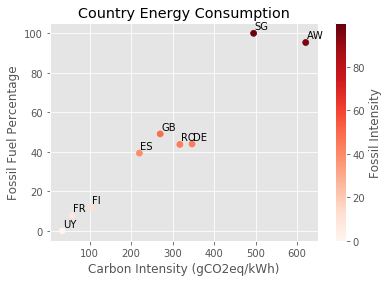

In [14]:
import numpy as np
import matplotlib.pyplot as plt

carbon = np.zeros(len(data))
fossil = np.zeros(len(data))
country = [''for i in range(len(data))]

for i in range(len(data)):
    carbon[i] = data[i]['data']['carbonIntensity']
    fossil[i] = data[i]['data']['fossilFuelPercentage']
    country[i] = data[i]['countryCode']
    

plt.style.use('ggplot')
fig, ax = plt.subplots()
my_plot = ax.scatter(carbon, fossil,
c = fossil,
cmap = plt.cm.Reds,
vmin=0,
vmax=fossil.max(),
linewidth=0.75
)
cbar = fig.colorbar(my_plot)
cbar.set_label("Fossil Intensity")
ax.set_xlabel('Carbon Intensity (gCO2eq/kWh)')
ax.set_ylabel('Fossil Fuel Percentage')
ax.set_title("Country Energy Consumption")

for i in range(len(country)):
    xy = [carbon[i],fossil[i]]
    text = [xy[0]+2, xy[1]+2]
    ax.annotate(country[i],xy,text)


plt.show()